In [1]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from scipy.special import softmax
%matplotlib inline

In [2]:
def remove_html(text):
    s = BeautifulSoup(text,'html')
    clean_html = s.get_text()
    return clean_html

def remove_punctuation(text):
    clean_punc = "".join([c for c in text if c not in string.punctuation])
    return clean_punc

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

def make_sentence(words):
    return " ".join(words)

In [3]:
N = 5000
data = pd.read_csv("IMDBDataset.csv",nrows=N)
print("N = %d"%len(data))
data['review'] = data['review'].apply(lambda x: remove_punctuation(x))
tokenizer = RegexpTokenizer(r'\w+')
data['review'] = data['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
#print(data['review'].head())

print("generating word representation")
texts = []
labels = []
for i in range(N):
    t = data['review'][i]
    texts.append(t)
    if data['sentiment'][i]=='positive':
        labels.append(1)
    else:
        labels.append(0)
corpus = [s for s in data['review'].apply(lambda x: make_sentence(x))]
#vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()
X_v = vectorizer.fit_transform(corpus)
X_v.toarray()
X_v = csr_matrix.todense(X_v)
X = np.array(X_v)

print("seperate training_data and testing_data")
N_train = int(N*0.8)
N_test = N - N_train
x_train = X[:N_train]
y_train = labels[:N_train]
x_test = X[N_train:]
y_test = labels[N_train:]

print(x_train.shape,x_test.shape)

N = 5000
generating word representation
seperate training_data and testing_data
(4000, 51518) (1000, 51518)


In [15]:
class PerceptronNet:
    def __init__(self):
        self.label = [1,-1]

    def fit(self,x_train,y_train,max_iter,lr,verbal=True):
        x_tmp_train = np.ones((len(x_train),1))
        x_train_f = np.append(x_train,x_tmp_train,axis=1)

        
        self.label
        self.w = np.random.randn(x_train_f.shape[1])
        #self.w = np.zeros(x_train_f.shape[1])

        self.errors = []
        self.iters = []
        iteration = 0

        while True:
            n_mis = 0
            g = np.dot(x_train_f,self.w)
            g[g>0] = 1
            g[g<0] = -1
            for j in range(len(g)):
                if g[j]!=self.label[int(y_train[j])]:
                    n_mis += 1
                    self.w = self.w + self.label[int(y_train[j])]*lr*x_train_f[j]
            error = n_mis/len(y_train)
            self.iters.append(iteration)
            self.errors.append(error)
            if (verbal):
                if(iteration%100==0):
                    print("iteration #%5d : error: %.3f"%(iteration,error))
                    #plot_data_line(w,x)
                    #plt.show()
            iteration += 1
            if(iteration>max_iter):
                print("Stop at max_iteration #%d"%(max_iter))
                break
            if error==0:
                print("Converged at iteration #%d"%(iteration))
                break
        return self.iters,self.errors
    
    def predict(self,x):
        x_tmp = np.ones((len(x),1))
        x_f = np.append(x,x_tmp,axis=1)
        g = np.dot(x_f,self.w)
        g[g>0] = 1
        g[g<0] = -1
        return g
    
    def evaluate(self,x,y):
        x_tmp = np.ones((len(x),1))
        x_f = np.append(x,x_tmp,axis=1)
        g = np.dot(x_f,self.w)
        g[g>0] = 1
        g[g<0] = -1
        n_mis = 0
        for j in range(len(g)):
            if g[j]!=self.label[int(y[j])]:
                n_mis += 1
        error = n_mis/len(y)
        return 1-error

iteration #    0 : error: 0.531
iteration #  100 : error: 0.401
iteration #  200 : error: 0.355
iteration #  300 : error: 0.324
iteration #  400 : error: 0.346
iteration #  500 : error: 0.142
iteration #  600 : error: 0.313
iteration #  700 : error: 0.343
iteration #  800 : error: 0.354
iteration #  900 : error: 0.120
iteration # 1000 : error: 0.079
iteration # 1100 : error: 0.121
iteration # 1200 : error: 0.061
iteration # 1300 : error: 0.053
iteration # 1400 : error: 0.049
iteration # 1500 : error: 0.039
iteration # 1600 : error: 0.417
iteration # 1700 : error: 0.040
iteration # 1800 : error: 0.026
iteration # 1900 : error: 0.019
iteration # 2000 : error: 0.019
iteration # 2100 : error: 0.013
iteration # 2200 : error: 0.011
iteration # 2300 : error: 0.031
iteration # 2400 : error: 0.033
iteration # 2500 : error: 0.005
iteration # 2600 : error: 0.005
iteration # 2700 : error: 0.014
iteration # 2800 : error: 0.003
iteration # 2900 : error: 0.019
iteration # 3000 : error: 0.001
iteratio

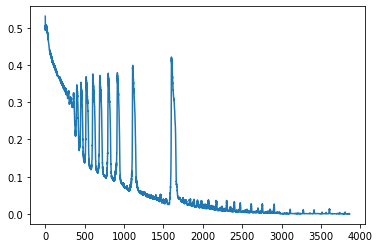

Test Accuracy: 0.847


In [16]:
perceptron = PerceptronNet()
iters,errors = perceptron.fit(x_train,y_train,5000,0.001,True)
plt.plot(iters,errors)
plt.show()
test_acc = perceptron.evaluate(x_test,y_test)
print("Test Accuracy: %.3f"%(test_acc))

In [17]:
import random

y_test_predict = perceptron.predict(x_test)
i_sample = random.sample(list(range(len(y_test))),len(y_test))
label_title = ["negative","positive"]
idx = 0
for i in i_sample:
    ans = y_test[i]
    pre = int(1/2*(1-y_test_predict[i]))
    if ans!=pre:
        idx += 1
        print("%3d : label:%s , predict:%s"%(idx,label_title[ans],label_title[pre]))
        print("------------------------")
        print(" ".join(data["review"][4000+i]))
        print("------------------------")
print("error:%3d/%4d"%(idx,len(y_test)))

  1 : label:negative , predict:positive
------------------------
pardon my spelling this is probably the funniest horror movie that ever existed think evil dead 1000 the acting is horrible you can see the makeup line on a certain ladys face there is a lesbian scene which makes no sense atall and the ending haha ohhhh the ending be prepared to have your stomach hurting from laughter now if you watch this film for more then 5 minutes and are still expecting something take a look at your self and ask what the hell is wrong with you this is a very bad movie meant to laugh at and enjoy for its pure sillinessbr br dont forget to watch all the outtakes after the movie you can see just how low budget the whole thing really was all in all this movie is a rare gem in demonstrating the pure and udder lack of talentcareabilitymoney and anything else you would ever need to make a successful film but its definitely worth watching
------------------------
  2 : label:positive , predict:negative
-----

In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_pca_view = [[],[]]
for i in range(len(x_train_pca)):
    x_pca_view[y_train[i]].append(x_train_pca[i])
    
for i in range(len(x_pca_view)):
    x_pca_view[i] = np.asarray(x_pca_view[i])
    
x_pca_view = np.asarray(x_pca_view)

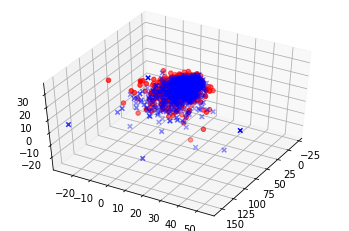

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca_view[0][:,0], x_pca_view[0][:,1], x_pca_view[0][:,2], c='r', marker='o')
ax.scatter(x_pca_view[1][:,0], x_pca_view[1][:,1], x_pca_view[1][:,2], c='b', marker='x')

ax.view_init(45,30)
plt.draw()

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(x_train)
x_tsne_view = [[],[]]
for i in range(len(X_embedded)):
    x_tsne_view[y_train[i]].append(X_embedded[i])
    
for i in range(len(x_tsne_view)):
    x_tsne_view[i] = np.asarray(x_tsne_view[i])
    
x_tsne_view = np.asarray(x_tsne_view)

plt.scatter(x_tsne_view[0][:,0],x_tsne_view[0][:,1],c="blue")
plt.scatter(x_tsne_view[1][:,0],x_tsne_view[1][:,1],c="red")
plt.show()